In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('housing.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'housing.csv'

<Axes: xlabel='longitude', ylabel='latitude'>

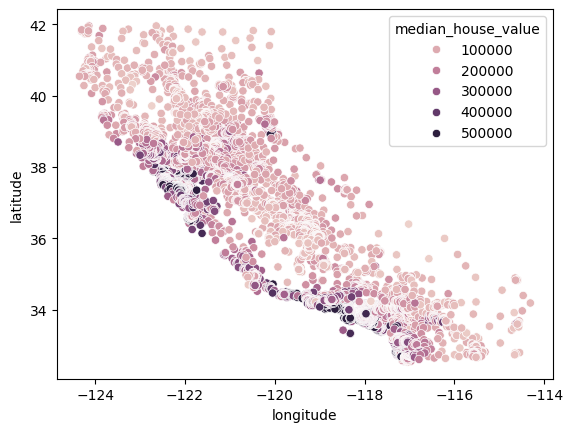

In [3]:
import seaborn as sns

sns.scatterplot(data = df, x = 'longitude', y = 'latitude', hue = 'median_house_value')

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df[['latitude', 'longitude']], df[['median_house_value']], test_size=0.33, random_state=0)

In [16]:
from sklearn import preprocessing
x_train_norm = preprocessing.normalize(x_train)
x_test_norm = preprocessing.normalize(x_test)
normalized_data = preprocessing.normalize(df[['latitude', 'longitude']])


In [17]:
print(x_train_norm)
print(x_test_norm)
print(normalized_data)

[[ 0.26937372 -0.96303572]
 [ 0.2762676  -0.96108075]
 [ 0.27623513 -0.96109009]
 ...
 [ 0.28741997 -0.95780466]
 [ 0.27416102 -0.9616838 ]
 [ 0.27304949 -0.96199999]]
[[ 0.26814898 -0.96337746]
 [ 0.2763347  -0.96106146]
 [ 0.30237043 -0.9531905 ]
 ...
 [ 0.29861539 -0.95437354]
 [ 0.27652634 -0.96100634]
 [ 0.27463527 -0.96154847]]
[[ 0.29601821 -0.9551823 ]
 [ 0.29589769 -0.95521964]
 [ 0.29578221 -0.9552554 ]
 ...
 [ 0.30932376 -0.95095679]
 [ 0.30909316 -0.95103176]
 [ 0.30885191 -0.95111014]]


In [21]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3)
kmeans.fit(normalized_data)


c:\Users\FADHIL\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

<Axes: xlabel='longitude', ylabel='latitude'>

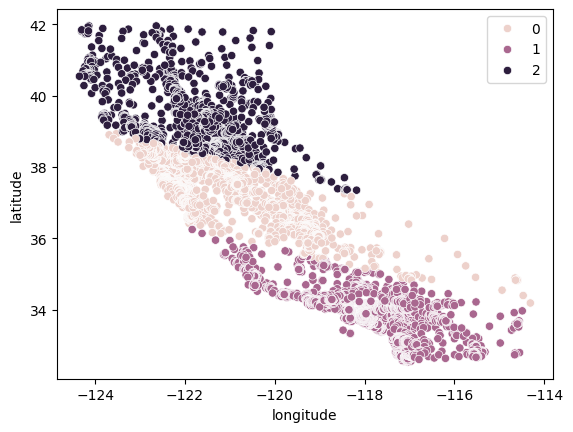

In [22]:
sns.scatterplot(data = df[['latitude','longitude']], x = 'longitude', y = 'latitude', hue = kmeans.labels_)

In [15]:
centers = kmeans.cluster_centers_
print('centers', centers)

centers [[ 0.29456947 -0.95562525]
 [ 0.27600217 -0.96115155]
 [ 0.30680363 -0.95175806]]


In [24]:
from sklearn.metrics import silhouette_score

silhouette_score(normalized_data, kmeans.labels_, metric='euclidean')

0.7499115323392396

In [26]:
K = range(2, 8)
fits = []
score = []


for k in K:
    # train the model for current value of k on training data
    model = KMeans(n_clusters = k, random_state = 0, n_init='auto').fit(normalized_data)
    
    # append the model to fits
    fits.append(model)
    
    # Append the silhouette score to scores
    score.append(silhouette_score(normalized_data, model.labels_, metric='euclidean'))